### There are number of ways to display video or other displays.
* One particular way is to use Ipython.display


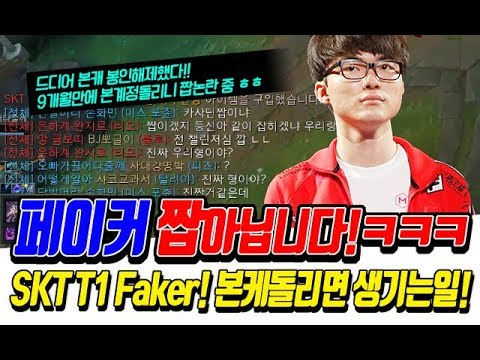

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("tCZCk8o6pks")

### Useful Ipython commands

%%writefile #Saves the content of that cell to an external file.

%pdb # Debugging

Can start cell with different kernel

%%bash
%%HTML
%%python2
%%python3
%%ruby
%%perl

### How to get help!
* Use help(). For example, help(np.mean)
* Press Shift + Tab for docstring of a function
* For more ipython magic, go to [THIS Website](http://ipython.readthedocs.io/en/stable/interactive/magics.html)


In [6]:
import numpy as np

# By importing numpy as np we can refer to a function foo in the module numpy
# as np.foo, rather than numpy.foo.

from datascience import *

# This way of importing a module lets us refer to the functions in the
# module without a prefix. That is in general NOT A GOOD IDEA because
# it can lead to name collisions

### If you want to install R kernel to you laptop, Use the commands below. But it is always easier to use Azure notebook!!


install.packages(c('repr', 'IRdisplay', 'crayon', 'pbdZMQ', 'devtools'))
devtools::install_github('IRkernel/IRkernel')
IRkernel::installspec()  # to register the kernel in the current R installation


### In python, int("object") is same as "object".int()
 So function can go to either front or back.

### Number of ways to play with strings

In [8]:
# Combine two string

'ab' + 'cd'

# Count in sting

'xxx'.count("x")

# Join in string

foo = "balloon"
bar = "big "
bar.join(foo)

# Replace

foo.replace('on', '')

# length of string
len("xxxxx")

# Convert string into Int
int("33")

# Convert to floats
float(123)


123.0

### Table

A summary of the methods for Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

In [9]:
from datascience import *

import numpy as np

In [10]:
table1 =Table().with_columns(
    "column name 1", make_array("row1", "row2", "row3"),
    "column name 2", make_array("row1", "row2", "row3"),
    "column name 3", make_array("row1", "row2", "row3")
)
table1



column name 1,column name 2,column name 3
row1,row1,row1
row2,row2,row2
row3,row3,row3


In [11]:
# Accessing a column

# returns an array


table1['column name 1']

table1[1]

table1.column('column name 1')

table1.column(1)

# Column names
table1.labels

# Table.where is very important function.!!!!!!!!

('column name 1', 'column name 2', 'column name 3')

In [12]:
# Accessing a row

table1.rows[0][1]

table1.row(1)

# Number of row

table1.num_rows

# Selecting Rows

table1.take[0:2]

# Selecting Rows with condition

table1.where('NEW', 'row2') # Row where NEW column eqauls row2

t.where(t['count'] < 8) # rows where count < 8

ValueError: label "NEW" not in labels ('column name 1', 'column name 2', 'column name 3')

In [13]:
# Permenant change to name of column

table1.relabeled("column name 1", "New")

New,column name 2,column name 3
row1,row1,row1
row2,row2,row2
row3,row3,row3


In [14]:
other_table = Table().with_columns([
   'mar_status',  ['married', 'married', 'partner', 'partner', 'married'],
    'empl_status', ['Working as paid', 'Working as paid', 'Not working',
                        'Not working', 'Not working'],
    'count',       [1, 1, 1, 1, 1]
])

t = Table().with_columns([
    'letter', ['a', 'b', 'c', 'z'],
    'count',  [  9,   3,   3,   1],
    'points', [  1,   2,   2,  10],
])

other_table

mar_status,empl_status,count
married,Working as paid,1
married,Working as paid,1
partner,Not working,1
partner,Not working,1
married,Not working,1


Group function group the table according to given column name
(collect = "Any function to be applied to rest of column")

In [15]:
t.select(["count","points"]).group("count", collect = np.mean)

count,points mean
1,10
3,2
9,1


Detail about parameters for pivots
* other_table.pivot(columns, rows, values=None, collect=None, zero=None)

In [16]:
other_table.pivot("mar_status", "empl_status", "count",collect= sum)

empl_status,married,partner
Not working,1,2
Working as paid,2,0


### It is possible to export the data by code.

In [17]:
table_name.to_df().to_csv('table_name.csv', index = False)

NameError: name 'table_name' is not defined

### Various array functions

In [ ]:
np.full(5, -1)

In [ ]:
# Find the difference between previous value
np.diff(temp)

In [ ]:
np.arange(1,10)

In [ ]:
np.arange(1,11,2)

In [ ]:
range(10)

# NOTE 2


In [2]:
# Import code libraries or "modules" in Python lingo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import sys
from datascience import *
sns.set_style("whitegrid")
%matplotlib inline

In [20]:
# Import some new methods for class Table
# Add IDS directory to search path

course_dir = "/Users/wxs/Dropbox/IDS/Git-reps/STAT180/"
computing_dir = course_dir + "Computing"

if computing_dir not in sys.path:
    sys.path.append(computing_dir)

from datascience_extensions import *

# Reload the extensions after we make a change
# Importing it again does not work - a module is imported only once
module_name = "datascience_extensions"
importlib.reload(sys.modules[module_name])

<module 'datascience_extensions' from 'C:\\Users\\jbsoo\\Desktop\\JayJung\\UW\\Stat 180\\datascience_extensions.py'>

In [21]:
# Add value to an array
np.append(3,5) 

array([3, 5])

### Basic Analysis of Dataset
pandas has several methods that allow you to quickly analyze a dataset and get an idea of the type and amount of data you are dealing with along with some important statistics.

* shape - returns the row and column count of a dataset
* describe() - returns statistics about the numerical columns in a dataset
* dtypes returns the data type of each column

for example, titanic.describe()

In [22]:
# Read the data into a table "titanic"
titanic = Table.read_table("titanic3-table.csv")

In [23]:
# Complication:
# There are missing values (nan) in the table. 
# 
# Let's count the missing values for each variable
nan_count = titanic.count_nan()
nan_count

# count_nan is a method in the module datascience_extensions

{'age': 263,
 'boat': 823,
 'body': 1188,
 'cabin': 1014,
 'embarked': 2,
 'fare': 1,
 'home.dest': 564,
 'name': 0,
 'parch': 0,
 'pclass': 0,
 'sex': 0,
 'sibsp': 0,
 'survived': 0,
 'ticket': 0}

### <span style="color:blue"> Feature types </span>

We distinguish between

* unordered categorical features ("sex", "embarked")
* ordered categorical features ("pclass")
* numerical features ("age")


## Analyzing conditional distribution

**Conditional Distribution**
* Conditional distribution of survival given pclass.
* Conditional distribution of pclass given survival.

If the conditional distribution of survived, given pclass depends on the value of pclass, then automatically the conditional distribution of pclass, given survived depends on the value of survived. This is a mathematical fact.


**Conditional distribution of survival given pclass.**

In [24]:
titanic_sub = titanic.drop("name", "sibsp", "parch", "ticket", "fare", "cabin", "boat", 
                           "body", "home.dest").take_complete_rows()
pivot_table = titanic_sub.select(["survived","pclass"]).take_complete_rows().pivot("survived","pclass")
pivot_table

pclass,0.0,1.0
1,103,179
2,146,115
3,370,131


In [25]:
cond_dist = titanic.pivot("survived", "pclass")
num_rows = cond_dist.num_rows
num_columns = cond_dist.num_columns
column_labels = cond_dist.labels
row_sum = np.full(num_rows, 0) # Makes an array with num_rows elements,

for i in np.arange(1, num_columns):
    row_sum = row_sum + cond_dist.column(i)
    
for column_index in np.arange(1, num_columns):
    the_column = cond_dist.column(column_index)
    rel_freq = the_column / row_sum
    cond_dist = cond_dist.with_column(column_labels[column_index], rel_freq)
    
cond_dist_given_pclass = cond_dist

**Conditional distribution of pclass given survival.**

In [26]:
cond_dist = titanic_sub.pivot("pclass", "survived")

num_columns = cond_dist.num_columns
num_rows = cond_dist.num_rows
column_labels = cond_dist.labels

row_sum = np.full(num_rows, 0)
for i in np.arange(1, num_columns):
    row_sum = row_sum + cond_dist.column(i)
    
for column_index in range(1, num_columns):
    the_column = cond_dist.column(column_index)
    rel_freq = the_column / row_sum
    cond_dist = cond_dist.with_column(column_labels[column_index], rel_freq)
    
conditional_given_survived = cond_dist

conditional_given_survived

survived,1.0,2.0,3.0
0,0.166397,0.235864,0.597738
1,0.421176,0.270588,0.308235


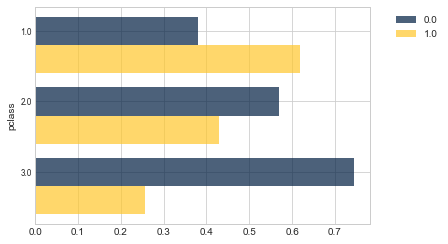

In [27]:
cond_dist_given_pclass.barh("pclass")

Converts pandas dataframe into a table
* Table.from_df(df)

Converts numpy array into a table
* Table.from_array(arr)

In [28]:
# How to forloop
x = []
for i in np.arange(1,10):
    x.append(i)
x


[1, 2, 3, 4, 5, 6, 7, 8, 9]

ValueError: too many values to unpack (expected 2)

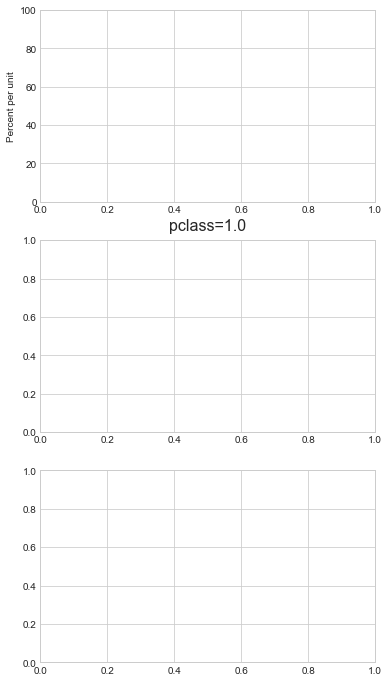

In [31]:
xx = titanic.select(["pclass", "age"]).group("pclass", np.nanmean)

titanic.hist("age", group = "pclass", overlay= False, bins= np.arange(0, 90,10))


## Summarizing numerical features

* The median is **resistant** against outliers - it is a typical value for the bulk of the data. Outliers are common in real data (data entry errors, instrument failure)
* The most common measure of scale is the **standard deviation**



Standard deviation = np.sqrt((x - np.mean(x))**2 / n)

In [34]:
squared_deviations_from_mean = (foo - np.mean(foo)) ** 2
almost_mean_squared_deviation = sum(squared_deviations_from_mean) / (len(foo) - 1)

# It is common to divide by (len(foo) - 1) rather than len(foo) for arcane 
# technical reasons

sd = (almost_mean_squared_deviation) ** 0.5

# We take the square root so that the measure of scale is in the same
# units as the feature itself


TypeError: cannot perform reduce with flexible type

### Visualizing numerical features

Recall: The collection of (category, relative frequency) pairs is called the distribution of a categorical feature.

We can draw the distribution of a numerical feature as a bar chart. Let's try that for the age of the titanic passengers.

In [ ]:
# Make a table with one column that has only the present (non-missing)
# values of age and draw a bar chart

age_count = titanic.select("age").take_complete_rows().group("age")

# Convert to relative frequencies

count = age_count.column("count")
rel_freq = count / sum(count)
age_dist = age_count.drop("count").with_column("rel_freq", rel_freq)
age_dist.bar("age")

## Looking at the pairs of features
* Looking at a pair of categorical features

### Looking at a pair of categorical features

In [ ]:
# Conditional distribution function
def conditional_distribution(table, feature, given_feature):
    '''For the dataset table calculate the conditional distributions of a 
    categorical feature, given another categorical feature'''
    cond_dist = table.pivot(feature, given_feature)
    num_rows = cond_dist.num_rows
    num_columns = cond_dist.num_columns
    column_labels = cond_dist.labels
    row_sum = np.full(num_rows, 0) 
    for i in np.arange(1, num_columns):
        row_sum = row_sum + cond_dist.column(i)
    for column_index in np.arange(1, num_columns):
        the_column = cond_dist.column(column_index)
        rel_freq = the_column / row_sum
        cond_dist = cond_dist.with_column(column_labels[column_index], rel_freq)
    return cond_dist

### Looking at a pair of a numerical and a categorical feature

**Two options**
* Conditional distribution of categorical given numerical.
* Conditional distribution of numerical given categorical.

In [ ]:
# Make horiontal scale the same
titanic_sub.hist("age", group = "pclass", overlay = False, range = [0, 80])
# or
titanic_sub.hist("age", group = "pclass", overlay = False, bins = np.arange(0, 90, 5))


In [ ]:
# Worng legend!!!!
titanic_sub.hist("age", group = "pclass", overlay = True, side_by_side = True, bins = np.arange(0, 90, 5))

In [ ]:
query_age = 50      # for example
window_width = 20

in_age_interval = titanic_sub.where("age", are.between(query_age - window_width / 2,
                                                      query_age + window_width / 2))
category_count_table = in_age_interval.group("pclass")
category_count_array = category_count_table.column("count")
category_rel_freq_array = category_count_array / sum(category_count_array)
category_rel_freq_table = category_count_table.drop(1).with_column("rel_freq", category_rel_freq_array)
category_rel_freq_table

**Please read this over carefully!**

In [ ]:
# Function that evaluates the conditional distribution of a categorical variable given a numerical variable
# on a regualr grid with ngrid gird points and draws the relative frequencies as curves

def draw_conditional_distribution(table, categorical_feature, given_numerical_feature,
                                  ngrid, window_width):
    cat_feat = categorical_feature
    num_feat = given_numerical_feature
    num_feat_values = table.column(num_feat)
    grid = np.linspace(min(num_feat_values), max(num_feat_values), ngrid)
    ncat = table.group(cat_feat).num_rows
    cats = table.group(cat_feat).column(cat_feat)
    rel_freqs = np.zeros((ncat, ngrid))
    for i in range(ngrid):
        in_window = table.where(num_feat, are.between(grid[i] - window_width / 2,
                                                      grid[i] + window_width / 2))
        cat_values = in_window.column(cat_feat)
        for j in range(ncat):
            rel_freqs[j, i] = sum(cat_values == cats[j])
        tot = 0
        for j in range(ncat):
            tot = tot + rel_freqs[j, i]
        if (tot != 0):
            for j in range(ncat):
                rel_freqs[j, i] = rel_freqs[j, i] / tot
    rel_freq_table = Table().with_columns(num_feat, grid)
    for i in range(ncat):
        rel_freq_table = rel_freq_table.with_columns(str(cats[i]), rel_freqs[i, :])
    rel_freq_table.plot(num_feat, overlay = True)
    return rel_freq_table
    

In [ ]:
rel_freq_table = draw_conditional_distribution(titanic_sub, "pclass", "age", 100, 20)

rel_freq_table.show(20)

**Interpretation**

* Young passengers are predominantly in 3rd class
* Old passengers are predominantly in 1st class

The curves get very noisy beyond age 60 because there are few passengers older than 60

In [ ]:
rel_freq_table = draw_conditional_distribution(titanic_sub, "survived", "age", 100, 20)


### Looking at the pair of two numerical features

In [ ]:
galton = Table.read_table('http://inferentialthinking.com/notebooks/galton.csv')

# Make feature names more consistent

galton = galton.relabeled(1, "fat_hei").relabeled(2, "mom_hei").relabeled(3, "mid_hei") \
         .relabeled(7, "chi_hei")

galton.show(2)

**Note:** The midparent height as defined by Galton is not the mean of fat_hei and mom_hei. In fact is is (fat_hei + 1.08 * mom_hei

He did it so that fat_hei and mom_hei would have the same influence on mid_hei.

In [ ]:
fat_hei_std = np.std(galton.column("fat_hei"))
mom_hei_std = np.std(galton.column("mom_hei"))
fat_hei_std / mom_hei_std

**The standard way of visualizing the distribution of a pair of numerical features is a scatterplot**

In [ ]:
galton.scatter("mid_hei", "chi_hei", width = 7, height = 7)

**Find conditional distribution of chi_hei given mid_hei = some number**

* Histogram is bad way because there are not enough number of mid_hei equal to particular number.
* Better way is to draw histogram of range of number and calculate mean.

In [ ]:
def conditional_mean(table, y, x, x_query, window_width, draw_histogram = False,
                     histogram_bins = None):
    '''
    From data in table estimate the conditional mean of numerical feature y, given
    numerical feature x = x_query, by averaging the values of y for the observations 
    (rows) with values of x in a window centered at x_query. 
    If draw_histogram = True the function draws a histogram of the conditional distribution. 
    ''' 
    table_sub = table.where(x, are.between(x_query - 0.5 * window_width,
                                           x_query + 0.5 * window_width))
    if draw_histogram:
        table_sub.hist(y, unit = None, bins = histogram_bins)
    return np.mean(table_sub.column(y))

In [ ]:
query_mid_hei = 67
window_width = 2
bins = np.arange(55, 80, 2)

conditional_mean(galton, "chi_hei", "mid_hei", query_mid_hei, window_width, 
                         True, bins)

#

**Conclusion**

The conditional distribution of chi_hei given mid_hei depends on the value of mid_hei. The mean of the conditional distribution (the "conditional mean") increases with mid_hei.

Following function draws conditional mean curve graph.

In [ ]:
def conditional_mean_curve(table, y, x, window_width, grid = None, plot = False):
    '''
    Plot the conditional mean of y, given x on a grid. Default grid has
    100 grid points, evenly spaced and spanning the range of the data
    '''
    if type(grid) != np.ndarray:
        ngrid = 100
        x_values = table.column(x)
        grid = np.linspace(min(x_values), max(x_values), ngrid)
    else:
        ngrid = len(grid)
    cond_mean = np.zeros(ngrid)
    for i in np.arange(ngrid):
        cond_mean[i] = conditional_mean(table, y, x, grid[i], window_width)
    tab = Table().with_columns(x, grid, ("cond_mean_of_" + y), cond_mean)
    if plot:
        tab.plot(x)
    return cond_mean
   

In [ ]:
cond_mean = conditional_mean_curve(galton, "chi_hei", "mid_hei", 2, plot = True)

It clearly shows that there is relationsihp with linear curve.
But! it is better to look at girls and boys seperately.


In [ ]:
# Let's calculate and plot the conditional mean of chi_hei given mid_hei separately for boys and girls

ngrid = 100
x = galton.column("mid_hei")
grid = np.linspace(min(x), max(x), ngrid)

galton_male = galton.where("gender", are.equal_to("male"))
galton_male_cond_mean = conditional_mean_curve(galton_male, "chi_hei", "mid_hei", 2,
                                               grid = grid)

galton_female = galton.where("gender", are.equal_to("female"))
galton_female_cond_mean = conditional_mean_curve(galton_female, "chi_hei", "mid_hei", 2,
                                               grid = grid)

tab = Table().with_columns("mid_hei", grid, "son_hei", galton_male_cond_mean, 
                           "daughter_hei", galton_female_cond_mean)

tab.plot("mid_hei")

**What if we wants to see the relationship between mother and father's height.**

**Problem** Each father-mother pair with more than one child appears multiple times. So if we simply compute the conditional mean curve of mom_hei given fat_hei, pairs with more children have more influence on the curve. That could potentially make a diffference. So we should make a new dataset where each father-mother pair appears only once. How would we do that?

In [ ]:
family_id = galton.column("family")
nchild = galton.num_rows
first_child_row_index = np.zeros(nchild, dtype = int)
family_seqnum = -1
last_family_id = -1
for i in np.arange(nchild):
    if family_id[i] != last_family_id:
        family_seqnum = family_seqnum + 1
        first_child_row_index[family_seqnum] = i
        last_family_id = family_id[i]

nfamily = family_seqnum + 1 
first_child_row_index = first_child_row_index[np.arange(nfamily)]
print("Number of families = ", nfamily)
print("Last row of table = ", galton.row(galton.num_rows - 1)) 

In [ ]:
galton_parents = galton.take(first_child_row_index)
galton_parents.show(10)

In [ ]:
bla = conditional_mean_curve(galton_parents, "mom_hei", "fat_hei", 4, plot = True)

**Cause and Effect**

* Observations
  * Individual(Study subjects)
  * Treatment
  * Outcome

* Questions to aske:
  * Association
  * Causality
 
  

# <span style="color:red"> Establishing causality: Randomization and permutation tests </span>

### Cloud seeding experiment(permutation test)

In [35]:
csd = Table.read_table("cloud-seeding-data (1).csv")
csd.show(5)
csd.num_rows

rainfall,treatment
4.9,unseeded
4.9,unseeded
2745.6,seeded
1697.8,seeded
1656,seeded


52

Does seed influence the rainfall????????

In [36]:
seeded = csd.where("treatment", are.equal_to("seeded"))
unseeded = csd.where("treatment", are.equal_to("unseeded"))

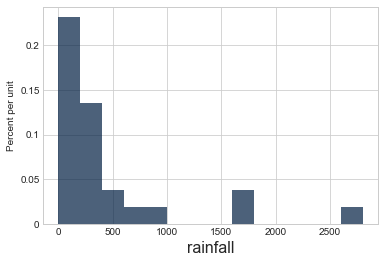

In [37]:
seeded.hist("rainfall", bins= np.arange(0, 3000, 200))

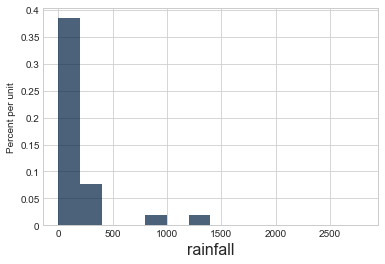

In [38]:
unseeded.hist("rainfall", bins= np.arange(0, 3000, 200))

It's better to use **Median** rather than mean. Because median is less influenced by outliers.

In [39]:
print("seeded : ", np.median(seeded.column("rainfall")))
print("unseeded : ", np.median(unseeded.column("rainfall")))

seeded :  221.6
unseeded :  44.2


It seems like seeding does indeed increase the rainfall. <br>
How do we know if we were not just lucky to pick seeded that was going to rain anyway??

### Permutation Test = Resampling

1. Suppose the cloud seeding had no effect!!

2. Then, we should get same value of rainfall for both seeded and unseeded.

3. 

**Possible explanation**

* Our "null hypotheses" that cloud seeding has no effect is false
* We were lucky in picking the clouds to be seeded

The probability of choosing out of ten equally likely possible assignments of the labels "seeded" and "unseeded" the one leading to the largest difference is 1/10 or 10%.

* The probability that we erroneously reject the null hypotheses is 0.1
* We can reject the null hypotheses of "no effect" at the 10% level
* The p-value of the test is 0.1


The number of ways to assign 26 seeded and 26 unseeded to 52 clouds is (52 choose 26). Cuz the number is too big, take a sample and compute median(seeded) - median(unseeded). And see the result!

Let's start with shuffle! By using x.smaple function!

In [40]:
# Shuffle the labels

# Randomize seeded or unseeded 
labels = csd.select("treatment")

shuffled_labels = labels.sample(k = labels.num_rows, with_replacement = False)
shuffled_labels
shuffled_labels.num_rows

52

94

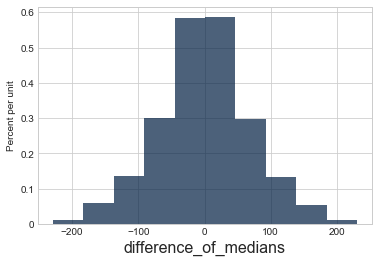

In [46]:
                                   
 # Computer median(seeded) - median(unseeded) for a large number of shuffels

num_assignments = 10000

# Create an empty array with size of number of assignment
difference_of_medians = np.zeros(num_assignments)

#
for i in range(num_assignments):
    # Shuffle the "treatment" so we can assign "seeded" or "unseeded" randomly.
    shuffled_labels = labels.sample(k = labels.num_rows, with_replacement = False).column("treatment")
    # Assign random treatment to data
    csd_shuffled = csd.with_column("treatment", shuffled_labels)
    # Find median of seeded and unseeded, and assign the difference to the array we have already created.
    med_seeded = np.median(csd_shuffled.where("treatment", are.equal_to("seeded")).column("rainfall")) 
    med_unseeded = np.median(csd_shuffled.where("treatment", are.equal_to("unseeded")).column("rainfall"))
    difference_of_medians[i] = med_seeded - med_unseeded

# Creat a table and histogram of the difference of medians    
dom_table = Table().with_column("difference_of_medians", difference_of_medians)

dom_table.hist("difference_of_medians")



We found the actually observed difference of median of seeded and unseeded. Now we will see where the actually observed difference median is placed in the 10000 sample of sampled median differences. 

In [48]:
# Calculate difference between medians for actually observed assignment of "seeded" and "unseeded"
                                     
med_seeded = np.median(csd.where("treatment", are.equal_to("seeded")).column("rainfall")) 
med_unseeded = np.median(csd.where("treatment", are.equal_to("unseeded")).column("rainfall"))
actually_observed_difference = med_seeded - med_unseeded

# Calculate how many of the random differences are larger that the the actually observed difference

dom_table.where("difference_of_medians", are.above(actually_observed_difference)).num_rows
                                  


94

Thus, there are only 94 samples that are above the median of observed data. Which means...

In [50]:
94 / 10000

0.0094

**RESULT**

* Our null hypothesis was cloud seeding has no effect.
* We reject the null hypothesis at the 0.94% level and p-value is 0.0094.
* SO if cloud seeding had no effect, the probability of observing the difference larger than our observation is 0.94%. 
* We can conclude if p-value is less than or equal to 0.05, then reject null hypothesis. SO we conclude that the cloud seeding has an effect.

### <span style="color:blue"> Is the gender discriminations in promotion decisions? A Psychology experiment </span>

In [52]:
Table().with_columns("gender", ["male", "female"], "promoted", [21, 14], "not promoted", [3, 10])

gender,promoted,not promoted
male,21,3
female,14,10


In [53]:
# Compute difference in promotion rate

delta = 21 / 24 - 14 / 24
delta

0.29166666666666663

Our Null Hypothesis : Gener on the personnel file had no influence on the promotion decision.
1. Let's label 13 not promoted "no", and 21+14=35 promoted "yes". Then, as seen, the difference in promotion rate of male and female is 0.29.
2. Let's see how likely the difference in promotion rate of male and female is greater than or equal to 0.29 if we assign the files randomly with out knowing the gender.

In [54]:
# An array of 35 yes and 13 no.
decision = np.append(np.full(35,"yes"), np.full(13, "no"))

# An array of 21 male and 14 female with respect to yes, and 3 male and 10 female with respect to no.
yes_gender = np.append(np.full(21, "male"), np.full(14, "female")) 
no_gender = np.append(np.full(3, "male"), np.full(10, "female"))
gender = np.append(yes_gender, no_gender)

# Concatenate two columns, and create a table
promotions = Table().with_columns("decision", decision, "gender", gender)


# Pivot by (decition,gender)
promotions.pivot("decision", "gender")


gender,no,yes
female,10,14
male,3,21


In [55]:
def proportions(pivot_tab):
    '''
    Convert rows of a pivot table to relative freuencies
    '''
    nrow = pivot_tab.num_rows
    ncol = pivot_tab.num_columns
    labels = pivot_tab.labels
    row_sum = np.zeros(nrow)
    for i in range(1, ncol):
        row_sum = row_sum + pivot_tab.column(i)
    for i in range(1, ncol):
        pivot_tab = pivot_tab.with_column(labels[i], pivot_tab.column(i) / row_sum)
    return(pivot_tab)
 

In [56]:
tab_prop = proportions(promotions.pivot("decision", "gender"))
tab_prop

gender,no,yes
female,0.416667,0.583333
male,0.125,0.875


In [66]:
observed_difference = np.diff(tab_prop.column("yes"))[0]
observed_difference

0.29166666666666663

Now do resampling.

In [62]:
def promotion_rate_difference(tab):
    pivot_tab = proportions(tab.pivot("decision", "gender"))
    yes = pivot_tab.column("yes")
    diff = yes[1] - yes[0]
    return(diff)
        

In [68]:
# Now shuffle the assigment of files to supervisers

num_assignments = 10000
diff = np.zeros(num_assignments)
gender = promotions.select("gender")
for i in range(num_assignments):
    shuffled_gender = gender.sample(k = gender.num_rows, with_replacement = False).\
    column("gender")
    promotions_shuffled = promotions.with_column("gender", shuffled_gender)
    diff[i] = promotion_rate_difference(promotions_shuffled)


2.3800000000000003

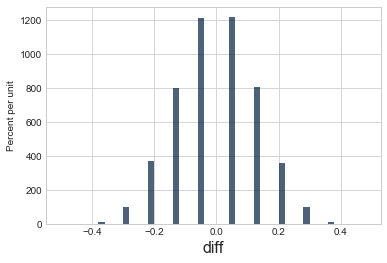

In [69]:
diff_table = Table().with_column("diff", diff)
diff_table.hist("diff", bins = np.arange(-0.5, 0.5, 0.02))

# Calculate the percentage of random differences that are larger 
# that the the actually observed difference

significance_level = diff_table.where("diff", are.above_or_equal_to(observed_difference)).num_rows / num_assignments
100 * significance_level

**Conclusion**

If there is no sex discrimination, the probablity of promotion rate greater than or equal to our observed value(0.29) is only 2.38 percent. Thus, there is storng evidence for sex discrimination.

## <span style="color:blue"> Confidence Interval </span>

Confident interval is a range of values that we are fairly sure that the true value lies within.

[x bar +- z * sigma/ n^0.5]

* The confident interval of 95% has z = 1.96


**Experiment with confidence intervals for a population mean**


In [6]:
delay_tab = Table.read_table("https://github.com/wstuetzle/STAT180/raw/master/\
Lectures/Sampling/united.csv")
delay_tab

Population = delay_tab.where("Delay", are.below_or_equal_to(100)).select("Delay")

Population.sample(100, with_replacement=True)

Delay
3
41
-2
4
90
7
2
-7
36
17


In [21]:
sample_size = [4, 16, 64, 256, 1024]
sample_num = 100000


# 

def evaluate_mean_and_sd(sample_size, sample_num, with_replacement = True):
    '''
    The function takes smaple size, sample num and with_replacement as a parameter.
    for number of sample)_num, create a sample of sample_size, and calculate mean and sd
    of each of the sample and return an array of sample mean and sds
    so evaluate_mean_and_sd[0] returns array of sample mean, and 
    evaluate_mean_and_sd[1] returns array of sample sd.
    '''
    sample_mean = np.zeros(sample_num)
    sample_sd = np.zeros(sample_num)
    for i in range(sample_num):
        sample = Population.sample(sample_size, with_replacement)
        sample_mean[i] = np.mean(sample.column("Delay"))
        sample_sd[i] = np.std(sample.column("Delay"))
        if i % 10000 == 0:
            print(str(i) + " ", end = "")
    return ([sample_mean, sample_sd])
    

In [19]:
mean_std_tab = Table()

for n in sample_size:
    
    evaluate_out = evaluate_mean_and_sd(n, sample_num)
    mean_estimates = evaluate_out[0]
    std_estimates = evaluate_out[1]
    mean_std_tab = mean_std_tab.with_column(str(n) + "-mean", mean_estimates)\
                                    .with_column(str(n) + "-std", std_estimates)
    
mean_std_tab.to_csv(mean_std_filename)

0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 

In [20]:
mean_std_tab.show(10)

4-mean,4-std,16-mean,16-std,64-mean,64-std,256-mean,256-std,1024-mean,1024-std
4.25,9.73075,6.875,18.9601,6.35938,20.4362,13.8281,23.5032,11.6055,22.5685
5.25,8.04285,20.625,29.1395,7.98438,18.9559,8.96875,18.0128,11.9434,22.5178
33,34.9571,12.125,19.261,10.3594,19.4136,12.0312,22.96,11.5273,21.701
10.75,15.6904,5.875,24.7156,12.6719,23.1436,9.03516,19.9345,11.5439,21.9212
15,15.7003,7.25,14.5323,12.5469,20.1137,9.71094,18.7775,10.6494,20.8959
10,14.5774,3.75,4.57575,9.67188,20.3301,9.02344,20.762,10.4141,21.5432
14,8.74643,3.8125,11.4522,8.78125,19.0652,11.9375,23.0323,11.5,21.7501
26.5,33.2603,10.75,23.6762,6.32812,14.6991,10.8281,22.0858,10.9746,22.2699
15,16.9853,13.5,21.0327,8.29688,17.74,11.5039,22.6597,10.9209,21.1922
11.5,11.2805,18.5625,34.0826,7.84375,18.1747,10.3984,20.7505,10.5479,21.5089


**The difference between parameter and statistics**
Statistics uses sample, while parameter uses whole population.
Standard error is std of statistics(samples), std is std of population.
For example, 20% of US senates voted for a particular measure(this is parameter). 20% of US resident supports universal health care(This is statistics)

In [26]:
# Compute coverage probabilities

Population_mean = np.mean(Population.column("Delay"))

for n in sample_size:
    mean_label = str(n) + "-mean"
    std_label = str(n) + "-std"
    sample_means = mean_std_tab.column(mean_label)
    sample_stds = mean_std_tab.column(std_label)
    ci_limits = Table().with_columns("lower", sample_means - 2 * sample_stds / n ** (0.5),\
                                     "upper", sample_means + 2 * sample_stds / n ** (0.5))
    cover_count = ci_limits.where("lower", are.below(Population_mean))\
                           .where("upper", are.above(Population_mean)).num_rows
    print("n = " + str(n) + "   cover percentage = " + str(100 * cover_count / sample_num))

n = 4   cover percentage = 68.263
n = 16   cover percentage = 86.913
n = 64   cover percentage = 93.322
n = 256   cover percentage = 94.986
n = 1024   cover percentage = 95.279


**Statistic = mean**

The sample mean is an unbiased estimate of the population mean. 
The standard deviation of the sample means (standard error) is (population std) / n^0.5, where n is the sample size. 
As the sample size n grows, the distribution of the sample means approximates the bell-shaped curve (Gaussian distribution)


**Statistic = std**

The sample std is a biased estimate of the population std, but the bias decreases as thesample size n increases
As the sample size n grows, the distribution of the sample stds approximates the bell-shaped curve (Gaussian distribution) 
For sufficiently large sample size, approximately 95% of sample stds are between (population std - 2 std of sample stds) and (population mean + 2 std of sample stds)

### Variability
Variability (also called spread or dispersion) refers to how spread out a set of data is. Variability gives you a way to describe how much data sets vary and allows you to use statistics to compare your data to other sets of data. The four main ways to describe variability in a data set are:

* Range
* Interquartile range
* Variance
* Standard deviation.

# <span style="color:red"> The Bootstrap</span>

Let's consider a situation where we draw sample of a population. One sample is not good enought to measure statistics, so we want to draw more samples. But in real life, drawing more samples through survey cost a lot of resoures. Instead, we draw resample from the sample. This is called **Boot strap**.
1. draw ramdom sample of size n.
2. create a sample population by using smaple we have drawn.(Not necessary in programming because we can use with_replacement = True)
3. make multiple bootstrap samples

In [28]:
population = delay_tab.where("Delay", are.below(100)).select("Delay")

def bootstrap_ci(sample, statistics, num_boots):
    resample_values = np.zeros(num_boots)
    
    for i in np.arange(num_boots):
        resample = sample.sample(sample.num_rows, with_replacement = True)
        resample_values[i] = statistic(resample)
    resample_std = np.std(resample_values)
    estimate = statistic(sample)   
    normal_theory_interval = [estimate - 2 * resample_std,
                              estimate + 2 * resample_std]
    percentile_interval = [np.percentile(resample_values, 2.5),
                           np.percentile(resample_values, 97.5)]
    return([normal_theory_interval, percentile_interval])

In [30]:
# First a few experiments with std

def statistic(table):
    return(np.std(table.column("Delay")))

sample_size = 1024
num_boot = 400

sample = Population.sample(sample_size, with_replacement = True)

confidence_intervals = bootstrap_ci(sample, statistic, num_boot)
print("Population parameter = ", str(statistic(Population)))
print("Estimate = ", str(statistic(sample)))
print("Normal theory interval = " + str(np.round(confidence_intervals[0],1)))
print("Percentile interval    = " + str(np.round(confidence_intervals[1],1)))

Population parameter =  21.5100346622
Estimate =  21.7608513564
Normal theory interval = [ 20.1  23.4]
Percentile interval    = [ 20.1  23.2]


In [31]:
# Now the mean. 

# Note: We do not need the Bootstrap to find "normal theory" confidence 
# intervals for the mean. We would in essence be finding the standard 
# error by computer simulation.

def statistic(table):
    return(np.mean(table.column("Delay")))

sample_size = 1024
num_boot = 400

sample = Population.sample(sample_size, with_replacement = True)
confidence_intervals = bootstrap_ci(sample, statistic, num_boot)
print("Population parameter = ", str(statistic(Population)))
print("Estimate = ", str(statistic(sample)))
print("Normal theory interval = " + str(np.round(confidence_intervals[0],1)))
print("Percentile interval    = " + str(np.round(confidence_intervals[1],1)))


Population parameter =  10.6614756577
Estimate =  11.1689453125
Normal theory interval = [  9.8  12.6]
Percentile interval    = [  9.8  12.6]


## <span style = "color:blue"> Statistical Learning </span> (Machine Learning)

In [1]:
# Import modules 

import numpy as np
from datascience import *
# from datascience_extensions import *
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import os.path
from sklearn.linear_model import LinearRegression

### <span style="color:blue"> Examples</span>

**Example 1: Credit rating **

* **Given:** Inormation on income, assets, debts, employment history, etc, supplied by applicant.


* **Goal:** Predict whether or not applicant will pay back the loan


* **Training sample**: Application data and payment history for previous loans

    

**Example 3: Handwritten digit regognition**

* **Given:** 16 x 16 gray scale image of handwritten digit. [Sample images](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)


* **Goal:** Identify digit


* **Training sample**: Collection of images for which digit is known

### <span style="color:blue"> The generic supervised learning problem</span>

* Universe of objects (credit aplicants, written digits, pixels in images)


* We observe features of objects or "predictor variables" (answers on credit application, grey level images of digits, spectra of pixels)(the ones we already know the answer to)


* Based on the observed values of the predictor variables we want to predict the value of a response variable (loan performance, digit, octanve level)(the one we are trying to answer)


* As basis for our prediction rule we have a training sample of objects for which we know the values of the predictor variables and value of response variable.


**Terminology**

* Supervised learning with continuous rsponse variable = "regression"


* Supervised learning with categorical response variable = "classification" or "discriminant analysis"

### <span style="color:blue"> Illustration: Predicting the fuel consumption of a car from its weight</span>

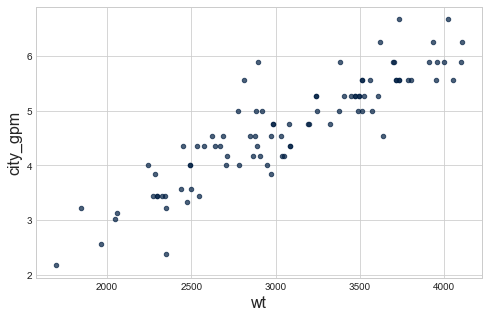

In [21]:
cars = Table.read_table("cars.csv")

# It makes more sense to make assumption of gallon per mile than mile per gallon
# Used 100 instead of 1 to simplify number
city_gpm = 100 / cars.column("city.mpg")
hwy_gpm = 100 / cars.column("hwy.mpg")
cars = cars.with_columns("city_gpm", city_gpm, "hwy_gpm", hwy_gpm)
cars.scatter("wt", "city_gpm", height = 5, width = 8)

By just looking at the plot, it looks like they have linear association.
Thus, let's try a linear prediction rule
city_mpg_predicted = a +  b $\star$ wt
<br>

**Measuring the performance of a prediction rule**

How well would we do if we used the prediction rule

city_gpm_predicted = -1 + wt / 500 ?

It is common practice to measure the perfomance of a prediction rule by its **mean squared error (mse)**
or by its square root, the **root mean squared error** 

In [38]:
city_gpm_predicted = -1 + cars.column("wt") / 500   # array of predicted values
mse = sum((cars.column("city_gpm") - city_gpm_predicted) ** 2) / cars.num_rows
print("mean squared error = " + str(mse))
print("root mean squared error = " + str(mse ** 0.5))

mean squared error = 0.477408095347
root mean squared error = 0.690947244981


The difference is not the mathematical expression, but rather what you are measuring.

**Mean squared error** measures the expected squared distance between an estimator and the true underlying parameter:

MSE(θ^)=E[(θ^−θ)2].
It is thus a measurement of the quality of an estimator.

The **mean squared prediction error** measures the expected squared distance between what your predictor predicts for a specific value and what the true value is:

MSPE(L)=E[∑i=1n(g(xi)−gˆ(xi))2].


1) When the value of MSE is zero, it means that there is perfect accuracy found by the estimator θ^ of the parameter θ. This condition is ideal and usually not practically possible.

2) An unbiased estimator having the smallest variance among all the given unbiased estimators is said to be the best prediction because it tends to minimise the variance. It is the best unbiased estimator and is known as the minimum variance unbiased estimator (abbreviated as MVUE).

3) The values of MSE could be used for making comparisons between two or more statistical models. It can be measured how well illustrated a given data set

**Is this the best we can do?**

### <span style="color:blue"> The least squares line</span>

Idea: **Find intercept a and slope b that give the smallest mean squared error for the training sample**

This line is called the **least squares line**

Finding the least squares line is easy both mathematically and computationally.

Here is Python code to do it:


In [40]:
# Fit straight line 

# LinearRegression is an object type, just like Table. It should have better be called
# LinearRegressionModel

lin_reg = LinearRegression()  # makes an "empty" model, just like Table() makes an empty table

# LinearRegression.fit(x, y) is a method, just like Table.with_columns("fifi", fifi)

# The .fit method expects two arguments:
#   x: a 2-dimensional array with as many rows as there are training observations
#      and as many columns as there are predictor variables.
#      The i-th column of x must contain the values of the ith predictor variable
#      for all the training observations
#   y: a 1-dimensional array containing the response values for the training 
#      observations

n = cars.num_rows
x = np.reshape(cars.column("wt"), (n,1)) 
y = cars.column("city_gpm")

lin_reg.fit(x, y)    # fits the straight line to the training samples

# LinearRegression.intercept_ and LinearRegression.coef_ are properties of 
# LinearRegression, just like Table.num_rows is a property of Table

a = lin_reg.intercept_
b = lin_reg.coef_[0]

print("a = " + str(a))
print("b = " + str(b))


a = 0.193666691782
b = 0.00146622923166


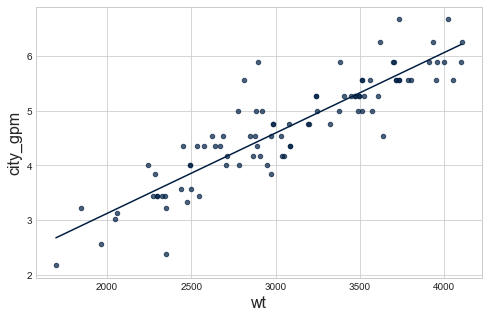

In [43]:
# Plot the line
cars.scatter("wt", "city_gpm", fit_line = True, height = 5, width = 8)

In [44]:
# Calculate the prediction errors

city_gpm_predicted = a + b * cars.column("wt")   # array of predicted values

# Alternatively we can use the LinearRegression.predict() method

city_gpm_predicted = lin_reg.predict(x)

errors = cars.column("city_gpm") - city_gpm_predicted
mse = np.mean(errors ** 2)
rmse = mse ** 0.5
mae = np.mean(abs(errors))   # Mean absolute error

print("mean squared error = " + str(mse))
print("root mean squared error = " + str(rmse))
print("mean absolute error = " + str(mae))

mean squared error = 0.179916195925
root mean squared error = 0.424165293164
mean absolute error = 0.3180704786




**The coefficient of determination**

The coefficient of determination compares predictive performance of the least squares line with the performance of a prediction rule that ignores the predictor variables.

The best constant prediction rule is the response mean (mathematical fact) 

<br>

The coefficient of determination is

R^2 = ( mse (constant) - mse ( ls_line))  /  mse ( constant)

결정계수는 이와 같이 표본관측으로 추정한 회귀선이 실제로 관측된 표본을 어느 정도 설명해 주고 있는가, 즉 회귀선이 실제관측치를 어느 정도 대표하여 그 적합성(goodness of fit)을 보여주고 있는가를 측정하는 계수로 나타낸 것인데, 이 값은 0과 1사이의 값을 가진다.
<br>

**Note:**

* R^2 is the relative improvement in prediction error obtained by using the predictor variable X to predict Y, rather than not using X


* R^2 = 0 if the least squares line has slope 0, i.e. if there is no linear association between Y and X


* R^2 = 1 if all the training observations lie exactly on a straight line





In [46]:
# In our example

mse_ls_line = np.mean((cars.column("city_gpm") - city_gpm_predicted) ** 2)
mse_constant = np.mean((cars.column("city_gpm") - np.mean(cars.column("city_gpm"))) ** 2)

Rsquared = (mse_constant - mse_ls_line) / mse_constant
Rsquared

0.80443144790371857

**The predictor variable wt explains 80% of the variance of city_gpm**


### <span style="color:blue"> Illustration: Predicting child height from midparent height</span>

In [3]:
galton = Table.read_table('http://inferentialthinking.com/notebooks/galton.csv')
# Make feature names more consistent

galton = galton.relabeled(1, "fat_hei").relabeled(2, "mom_hei").relabeled(3, "mid_hei") \
         .relabeled(7, "chi_hei")

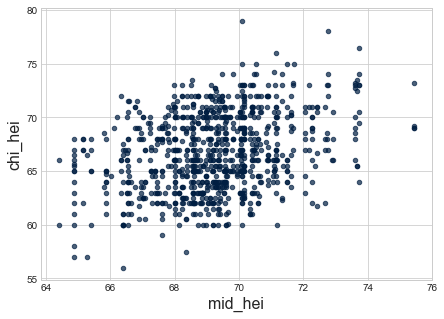

In [5]:
galton.scatter("mid_hei", "chi_hei", width = 7)

In [7]:
# fit least square line
lin_reg = LinearRegression()

x = np.reshape(galton.column("mid_hei"), (galton.num_rows,1))
y = galton.column("chi_hei")

lin_reg.fit(x,y)

a = lin_reg.intercept_
b = lin_reg.coef_[0]
print("a = " + str(a))
print("b = " + str(b))

a = 22.6362405496
b = 0.637360896969


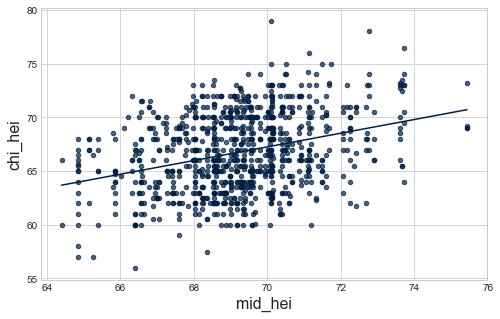

In [9]:
# Draw scatterplot with LS line
# fit_line = True creates regression line

galton.scatter("mid_hei", "chi_hei", width = 8, height = 5, fit_line = True)

In [11]:
# Calculate mean squared error

chi_hei_predicted = lin_reg.predict(x)
errors = galton.column("chi_hei") - chi_hei_predicted
mse = np.mean(errors ** 2)
rmse = mse ** 0.5  # root mean squared error
mae = np.mean(abs(errors))

print("mean squared error = " + str(mse))
print("root mean squared error = " + str(rmse))
print("mean absolute error = " + str(mae))


mean squared error = 11.4790855199
root mean squared error = 3.3880799164
mean absolute error = 2.8648148992


**On average the prediction is off by about 3 inches**

** Make prediction rule for boys only**

a_boys = 19.9134626413
b_boys = 0.713274497274


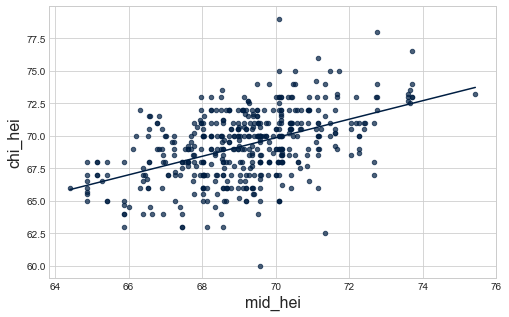

In [17]:
boys = galton.where("gender", are.equal_to("male"))

x_boys= np.reshape(boys.column("mid_hei"), (boys.num_rows, 1))
y_boys = boys.column("chi_hei")

lin_reg_boys = LinearRegression()
lin_reg_boys.fit(x_boys,y_boys)
a_boys = lin_reg_boys.intercept_
b_boys = lin_reg_boys.coef_[0]
print("a_boys = " + str(a_boys))
print("b_boys = " + str(b_boys))
#
boys.scatter("mid_hei", "chi_hei", width = 8, height = 5, fit_line = True)

In [18]:
# Calculate average squared prediction error

boys_hei_predicted = lin_reg_boys.predict(x_boys)
errors = boys.column("chi_hei") - boys_hei_predicted
mse_boys = np.mean(errors ** 2)
rmse_boys = mse_boys ** 0.5  # root mean squared error
mae_boys = np.mean(abs(boys.column("chi_hei") - boys_hei_predicted))

print("mean squared error = " + str(mse_boys))
print("root mean squared error = " + str(rmse_boys))
print("mean absolute error = " + str(mae_boys))


mean squared error = 5.26937651795
root mean squared error = 2.29551225611
mean absolute error = 1.8122062057


###  <span style="color:blue"> Generalizing straight line fits to more than one predictor variable</span>

** Illustration:** Predicting fuel consumption of cars from weight and engine displacement


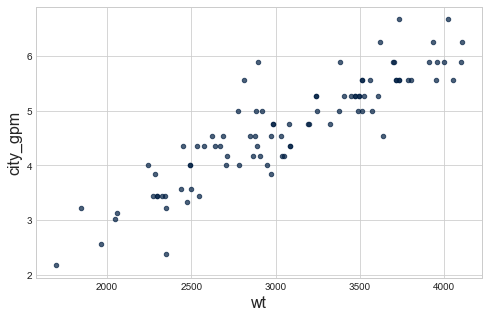

In [22]:
# Plot city.gpm versus weight

cars.scatter("wt", "city_gpm", height = 5, width = 8)

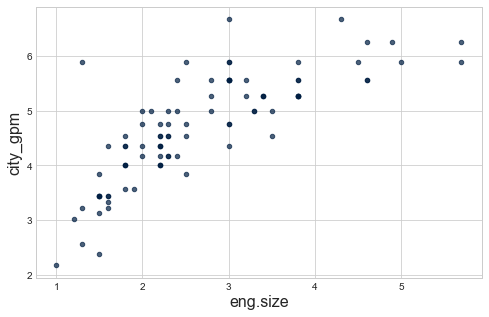

In [23]:
# Plot city_gpm versus eng.size

cars.scatter("eng.size", "city_gpm", height = 5, width = 8)

**There is a strong positive association between eng.size and city_gpm**

So one might think that adding eng.size as a second predictor variables would improve predictive performance.

<br>

** We already generated a rule to predict city_gpm from weight alone.**

The rule was

city_gpm_predicted = 0.19 + 0.0015  $\star$  wt

This rule explained about 80% of the variance of city_gpm

<br>

** Now we add engine displacement as a second predictor variable**

The prediction rule will be of the form

city_gpm_predicted = a0 + a1  $\star$  wt + a2  $\star$ eng.size

<br>

We choose the coefficients a0, a1, a2 to minimize the sum of squared prediction errors for the training sample

Here is the Python code to do it

In [24]:
n = cars.num_rows
X = np.reshape(cars.column("wt"), (n,1)) 
# hstack is horizontal stack. just like adding a column
X = np.hstack((X, np.reshape(cars.column("eng.size"), (n,1))))
y = cars.column("city_gpm")
lin_reg = LinearRegression()
lin_reg.fit(X, y)
a0 = lin_reg.intercept_
a1 = lin_reg.coef_[0]
a2 = lin_reg.coef_[1]
print("a0 = " + str(a0))
print("a1 = " + str(a1))
print("a2 = " + str(a2))

a0 = 0.35807272135
a1 = 0.00133756420364
a2 = 0.0865785205875


**Now calculate prediction error(mse) for training sample**

In [26]:
city_gpm_predicted = lin_reg.predict(X)
errors = cars.column("city_gpm") - city_gpm_predicted

mse = np.mean(errors ** 2)  # average squared error
rmse = mse ** 0.5           # root mean squared error
mae = np.mean(abs(errors))

print("mean squared error = " + str(mse))
print("root mean squared error = " + str(rmse))
print("mean absolute error = " + str(mae))

mean squared error = 0.177635216401
root mean squared error = 0.421467930453
mean absolute error = 0.314391221562


**Adding eng.size as a second predictor variable did not improve the predictive performance.**

There clearly is a positive association between eng.size and city_gpm (although it may not be linear). So how come it did not help?

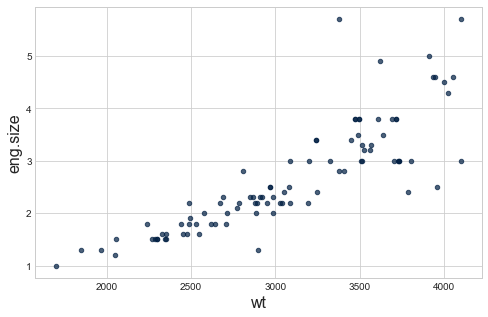

In [27]:
cars.scatter("wt", "eng.size", height = 5, width = 8)

**There is a srong association between wt and eng.size**

So once we know wt, eng.size does not add much predictive information.

# <span style ="color:blue"> Statistical Learning Part 2: Nearest neighbor classification</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from datascience import *
%matplotlib inline

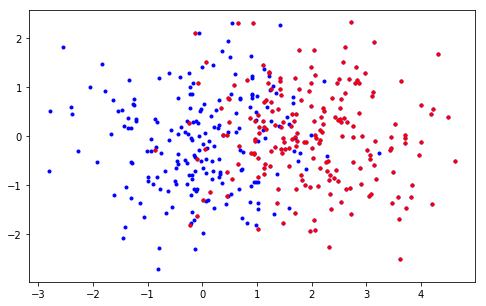

In [2]:
# Plot data for a simple classification problem
n0 = 200
n1 = 200
n = n0 + n1

offset = 2

X_train = np.random.randn(n, 2)
for i in np.arange(n0):
    X_train[i, 0] = X_train[i, 0] + offset
true_class_train = np.concatenate((np.full(n0, 0), np.full(n1, 1)))

X_test = np.random.randn(n, 2)
for i in np.arange(n0):
    X_test[i, 0] = X_test[i, 0] + offset
true_class_test = np.concatenate((np.full(n0, 0), np.full(n1, 1)))

plt.figure(figsize = (8, 5))
plt.plot(X_train[:, 0], X_train[:, 1], "b.")
plt.plot(X_train[:n1, 0], X_train[:n1, 1], "r.")

### <span style="color:blue"> Basic idea of nearest neighbor classification </span>

The plot above shows the training data for a simple classification problem.  There are 2 predictor variables. Each training observation has a class label, either "red" or "blue". 

We want a prediction rule that predicts the class for a query observation for which we only know the values of the predictor variables.

Suppose the query observation had coordinates x1 = -1, x2 = 0. What class would one predict? The training observations around the query point are predominantly of class "blue", so one would probably predict class "blue" for the query observation.

Suppose, on the other hand, the query observation had coordinates x1 = 3, x2 = 0. The training observations around the query point are predominantly of class "red", so one would probably predict class "red" for the query observation.


This motivates the basic idea of knn (k-nearest-neighbor) classification: 

**Find the k training observations closest to the query point and predict the majority class**


**Key issue:** How do we define distance in predictor space?

**Simplest version:** Define the distance between two points x = (x1,  x2) and y = (y1, y2) as 
<br>d(x, y) = sqrt((x1 - y1)^2 + (x2 - y2)^2)

This definition generalizes to more than two predictor variables.

### <span style="color:blue"> Scikit-learn: A code library for supervised learning</span>

[Scikit-learn](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) contains Python implementations for many supervised learning methods. 

There is an object type (or "class") called "KNeighborsClassifier". We have to import the class definition and the associated methods from the module "sklearn.neighbors" with the Python statement <br>
*from sklearn.neighbors import KNeighborsClassifier*

<br>

**Note:** You have already worked with classes and methods: "Table" is a class. The statement <br>
*my_table = Table ()* <br>
creates a table and assigns it to the variable my_table. Then there are methods that let you operate on tables. For example <br>
*my_table.labels* <br>
returns the column labels of my_table.

<br>

**Analogously** the statement <br>
*my_classifier = KNeighborsClassifier (k)* <br>
creates a knn classifier and assigns it to the variable my_classifier.

The most important methods for class KNeighborsClassifier are "fit" and "predict":

*my_classifier.fit (X_train, y_train)* <br>
trains the classifier. Here X_train is 2-dimensional array with as many rows (n_train) as there are training observations and as many columns (m) as there are predictor variables, and y_train is an array of length n_train containing the response values for the training sample.

*my_classifier.predict (X_query)* <br>
returns the predicted values for query points in predictor space. Here X_query is a 2-dimensional array with m columns and as many rows (n_query) as there are query points.

<br>
 
**Remember**
* *dir (my_classifier)* displays a list of all the methods for for class KNeighborsClassifier
* my_classifier.fit? displays the docstring for the *fit* method

In [4]:
# Assumptions: 
# * The training_sample is given in the form of a Table
# 
# * The response_name column contains the response values for the
#   training observations. 
#
# * The remaining columns of training_sample contain the values 
#   of the predictor variables
#
# * The columns of test_sample contain the values 
#   of the predictor variables
#
# Note: Before calling knn_classifier_fit ond knn_classifier_predict
# you have to create a KNeighborsClassifier object, as in
#
k = 3
knn_classifier = KNeighborsClassifier(k)

def knn_classifier_fit(knn_classifier, training_sample, response_name):
    ntrain = training_sample.num_rows
    response = training_sample.column(response_name)
    predictors = training_sample.drop(response_name)
    npred = predictors.num_columns
    predictor_array = np.zeros((ntrain, npred))
    for i in np.arange(npred):
        column_i = predictors.column(i)
        for j in np.arange(ntrain):
            predictor_array[j, i] = column_i[j]
    knn_classifier.fit(predictor_array, response)
    return(knn_classifier)

def knn_classifier_predict(knn_classifier, test_sample):
    ntest = test_sample.num_rows
    npred = test_sample.num_columns
    predictor_array = np.zeros((ntest, npred))
    for i in np.arange(npred):
        column_i = test_sample.column(i)
        for j in np.arange(ntest):
            predictor_array[j, i] = column_i[j]
    predicted_response = knn_classifier.predict(predictor_array)
    return(predicted_response)

# Test code below

# digit_train = Table.read_table("optdigits-train.csv")
# digit_test = Table.read_table("optdigits-test.csv")
# response_name = "64"

# k = 3
# knn_classifier = KNeighborsClassifier(k)
# knn_classifier = knn_classifier_fit(knn_classifier, digit_train, response_name)

# predicted_response_train = knn_classifier_predict(knn_classifier, digit_train.drop(response_name))
# predicted_response_test = knn_classifier_predict(knn_classifier, digit_test.drop(response_name))

# digit_train_with_prediction = digit_train.with_column("predicted_response", predicted_response_train)
# nerror_train = digit_train_with_prediction.where("predicted_response", are.not_equal_to, response_name).num_rows
# error_rate_train = 100 * nerror_train / digit_train.num_rows
# print("Training error rate = " + str(error_rate_train))

# digit_test_with_prediction = digit_test.with_column("predicted_response", predicted_response_test)
# nerror_test = digit_test_with_prediction.where("predicted_response", are.not_equal_to, response_name).num_rows
# error_rate_test = 100 * nerror_test / digit_test.num_rows
# print("Test error rate = " + str(error_rate_test))


### <span style="color:blue"> Illustration: Handwritten digit recognition</span>

**Training sample:** 3,823 8 $\times$ 8 grey level images

In [1]:
# Read handwritten digits training data

digit_train = Table.read_table("optdigits-train.csv")
print(digit_train.num_rows)
print(digit_train.num_columns) 
print(digit_train.group(64))     # Last column is ground truth
digit_train = digit_train.relabel("64", "true_digit")


# Read handwritten digits test data

digit_test = Table.read_table("optdigits-test.csv")
print(digit_test.num_rows)
print(digit_test.num_columns) 
print(digit_test.group(64))     # Last column is ground truth
digit_test = digit_test.relabel("64", "true_digit")

NameError: name 'Table' is not defined

4

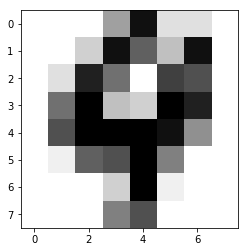

In [8]:
# Look at some images

i = 1000
row_i = np.array(digit_train.row(i))
image_i = 16 - row_i[np.arange(64)].reshape((8, 8))
plt.imshow(image_i, cmap='gray')   #, interpolation='nearest')
row_i[64]


In [10]:
# Train classifier

k = 20
knn_classifier = KNeighborsClassifier(k)
ignore = knn_classifier_fit(knn_classifier, digit_train, "true_digit")

# Calculate error rate for training sample ("resubstitution error rate")

predicted_digit_train = knn_classifier_predict(knn_classifier, digit_train.drop("true_digit"))
error_rate_train = np.mean(digit_train.column("true_digit") != predicted_digit_train)
100 * error_rate_train

1.8310227569971229

**The error rate is only 1.8%**

**However we were cheating:** We used the training data for creating (training) the prediction rule and for evaluating the rule. This does not reflect how the rule would be used in practice. In practice we would use the rule on new images which had not been used in training.

The error rate obtained when classifying the training observations is called the resubstitution error rate or training error rate

We will now compute the error rate when applying the prediction rule obtained from the training sample to classify a new set of images (test data) for which know the true_digit but which were not used in training. The error rate obtained when classifying the test data is called the test error rate.

Uner the assumption that the test data are a random sample from the same population to which the prediction rule will ultimately be applied, the test error is a realistic estimate for the eror rate we can expect when we actually use the rule.

**Training error** is the error that you get when you run the trained model back on the training data. Remember that this data has already been used to train the model and this necessarily doesn't mean that the model once trained will accurately perform when applied back on the training data itself.

**Test error** is the error when you get when you run the trained model on a set of data that it has previously never been exposed to. This data is often used to measure the accuracy of the model before it is shipped to production.

In [11]:
# Let's see how we do on the test set

predicted_digit_test = knn_classifier_predict(knn_classifier, digit_test.drop("true_digit"))
error_rate_test = np.mean(digit_test.column("true_digit") != predicted_digit_test)
100 * error_rate_test

2.8937117417918752

**The test error is almost 50% larger than the training error !!** The training error rate is not a realistic estimate for the test error rate.

### <span style="color:blue"> Dependence of the error rate on k </span>

In [12]:
# Both test and training errors depend on k. Let's compute them for a range of values

trial_k = np.array([1, 3, 5, 9, 13, 19, 25, 32, 39])
nk = len(trial_k)
error_rate_train = np.zeros(nk)
error_rate_test = np.zeros(nk)

for i in np.arange(nk):
    k = trial_k[i]
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier_fit(knn_classifier, digit_train, "true_digit")
    predicted_digit_train = knn_classifier_predict(knn_classifier, digit_train.drop("true_digit"))
    error_rate_train[i] = np.mean(digit_train.column("true_digit") != predicted_digit_train)
    predicted_digit_test = knn_classifier_predict(knn_classifier, digit_test.drop("true_digit"))
    error_rate_test[i] = np.mean(digit_test.column("true_digit") != predicted_digit_test)
    print(str(trial_k[i]) + " ", end = "")

1 3 5 9 13 19 25 32 39 

In [14]:
print(100 * error_rate_train)
100 * error_rate_test

[ 0.          0.7324091   1.04629872  1.28171593  1.41250327  1.77870782
  1.98796756  2.14491237  2.38032958]


array([ 2.0033389 ,  2.17028381,  2.1146355 ,  2.28158041,  2.61547023,
        2.89371174,  2.94936004,  3.33889816,  3.39454647])

In this example the value of k which minimizes the training error rate also
minimizes the test error rate.

**This is not typical**

### <span style="color:blue"> A more typical example </span>

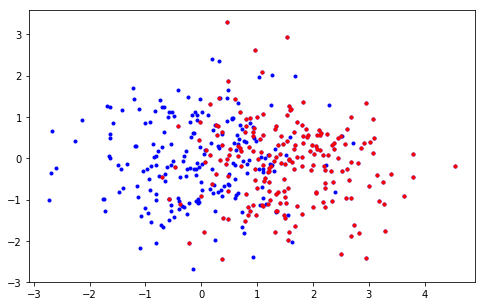

In [16]:
# Create an example

n0 = 200
n1 = 200
n = n0 + n1

offset = 1.5

X_train = np.random.randn(n, 2)
for i in np.arange(n0):
    X_train[i, 0] = X_train[i, 0] + offset
true_class_train = np.concatenate((np.full(n0, 0), np.full(n1, 1)))

X_test = np.random.randn(n, 2)
for i in np.arange(n0):
    X_test[i, 0] = X_test[i, 0] + offset
true_class_test = np.concatenate((np.full(n0, 0), np.full(n1, 1)))

plt.figure(figsize = (8, 5))
plt.plot(X_train[:, 0], X_train[:, 1], "b.")
plt.plot(X_train[:n1, 0], X_train[:n1, 1], "r.")

demo_train = Table().with_columns("0", X_train[:, 0], "1", X_train[:, 1], "true_class", true_class_train)
demo_test = Table().with_columns("0", X_test[:, 0], "1", X_test[:, 1], "true_class", true_class_test)


In [17]:
# compute training and test errors for a range of k's

trial_k = np.array([1, 3, 5, 9, 13, 19, 25, 32, 39, 48, 57, 66, 77, 88, 101, 114])
nk = len(trial_k)
error_rate_train = np.zeros(nk)
error_rate_test = np.zeros(nk)

for i in np.arange(nk):
    k = trial_k[i]
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier_fit(knn_classifier, demo_train, "true_class")
    predicted_class_train = knn_classifier_predict(knn_classifier, demo_train.drop("true_class"))
    error_rate_train[i] = np.mean(demo_train.column("true_class") != predicted_class_train)
    predicted_class_test = knn_classifier_predict(knn_classifier, demo_test.drop("true_class"))
    error_rate_test[i] = np.mean(demo_test.column("true_class") != predicted_class_test)
    print(str(trial_k[i]) + " ", end = "")

1 3 5 9 13 19 25 32 39 48 57 66 77 88 101 114 

In [ ]:
100 * error_rate_train

In [ ]:
100 * error_rate_test

### <span style="color:blue"> Finding a good k using cross-validation </span>

In practice data are often scarce, so using part of the data as a test set is undesirable. A way to get around this problem is **cross-validation**:

* Randomly divide the data set S into m (roughly) equal sized subsets S_1,...,S_m (for example m = 10) 


* For i in 1..m:

  * Set subset S_i aside
  
  * Train classifiers on S - S_i (S with S_i removed) for a set of trial values k_1,...k_L
  
  * For each of these classifiers calculate the number of errors when classifying the observations in S_i
  
  
* This produces m error counts for each of the L values of k.


* Calculate the total number of errors for each value of k


* Choose the value of k with the fewest total errors.

<br>

**Note:** This kind of cross-validation where we partition the data into blocks and hold out one block at a time is widely applicable.

In the particular case on knn classification there is a much simpler method: When predicting the response for training observation i, remove observation i from the training set. This is the same as taking majority vote among the k+1 nearest neighbors of observation i, but not including observation i itself. This option is not available in the Scikit-learn implementation of knn classification.



In [ ]:
# Let's try 10-fold cross-validation on the digit_train data set

# trial_k = np.array([1, 3, 5, 9, 13, 19, 25, 32, 39, 48, 57, 66, 77, 88, 101, 114])
trial_k = np.array([1, 3, 5, 9, 13, 19, 25, 32, 39])
nk = len(trial_k)
nfold = 10  # 5-fold cross-validation

digit_train = Table.read_table("optdigits-train.csv")
digit_train.relabel("64", "true_digit")
ntrain = digit_train.num_rows

fold_id = Table().with_column("fold_id", np.arange(ntrain) % nfold)\
         .sample(ntrain, with_replacement = False).column("fold_id")
digit_train = digit_train.with_column("fold_id", fold_id)

error_table = Table()  # A table with nk columns and nfold rows

# Outer loop over k
# Inner loop over folds

for i in np.arange(nk):
    knn_classifier = KNeighborsClassifier(trial_k[i])
    errors_for_folds = np.zeros(nfold)
    for j in np.arange(nfold):
        knn_classifier = KNeighborsClassifier(trial_k[i])
        training_set = digit_train.where("fold_id", are.not_equal_to(j)).drop("fold_id")
        test_set = digit_train.where("fold_id", are.equal_to(j)).drop("fold_id")
        # print(str(training_set.num_rows) + " " + str(test_set.num_rows))
        knn_classifier_fit(knn_classifier, training_set, "true_digit")
        predicted_digit = knn_classifier_predict(knn_classifier, test_set.drop("true_digit"))
        test_set = test_set.with_column("predicted_digit", predicted_digit)
        nerror_test = test_set.where("predicted_digit", are.not_equal_to, "true_digit").num_rows
        errors_for_folds[j] = nerror_test
    error_table = error_table.with_column(str(trial_k[i]), 100 * errors_for_folds / ntrain)
    print(str(trial_k[i]), end = " ")

                      

In [ ]:
error_table.stats(ops = (sum,))      

### <span style="color:red"> This looks fishy </span>

The error rate for the training set estimated using cross-validation is much smaller than the error rate for the test set.